## Goal: produce prettier plots for the report

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.ticker import MaxNLocator
import astropy.units as u
import sys
from typing import Callable
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
from matplotlib.patches import Patch


sys.path.insert(0, "../")
from digital_twin.plotting import (
    plot_1d,
    find_x_scale,
    plot_operating_modes,
    plot_1d_multiple,
)

In [76]:
def plot_1d_and_background_and_threshold(
    x: np.ndarray,
    y: np.ndarray,
    title: str,
    xlabel: str,
    ylabel: str,
    boolean_array_background: np.ndarray,  # array of booleans to plot in the background
    colors_background: str,
    legend_background: str,
    step: int = 1,
    horizontal_line_value: float = None,
    horizontal_line_color: str = None,
    horizontal_line_legend: str = None,
    fill_under: bool = True,
    remove_box: bool = True,
    x_range: tuple = None,
    y_range: tuple = None,
    scatter: bool = False,
    x_label_f: Callable = None,
    custom_y_ticks: bool = False,
    y_ticks: np.ndarray = None,
    y_tick_labels: np.ndarray = None,
    custom_x_ticks: bool = False,
    x_ticks: np.ndarray = None,
    x_tick_labels: np.ndarray = None,
    save_filename: str = None,
    show: bool = True,
    markersize_plot: int = 4,
    date_x_axis: bool = False,
    date_interval: int = 1,
    date_format: str = "%d/%m/%Y",
) -> None:
    """Function for general plotting in 2d with x and y arrays as input.
    Many parameters are optional to change the visualization design."""
    # Downsample the x and y arrays
    x_downsampled = x[::step]
    y_downsampled = y[::step]

    # Create the plot
    plt.figure(figsize=(6, 4))

    # Highlighting background for true values in boolean_array_background
    if len(boolean_array_background) != len(x):
        raise ValueError("Length of boolean_array_background must match length of x.")
    for i, highlight in enumerate(boolean_array_background[::step]):
        if highlight:  # Add background only where boolean is True
            plt.axvspan(
                x_downsampled[i] - step / 2,  # Start of the band
                x_downsampled[i] + step / 2,  # End of the band
                color=colors_background,
                alpha=1,
            )
    patch = Patch(color=colors_background, alpha=1, label=legend_background)

    # Add horizontal line if specified
    if horizontal_line_value is not None:
        # plt.axhline(y=horizontal_line_value, color="red", linestyle="--", linewidth=1.5, label=f"Line at {horizontal_line_value}")
        # # Automatically add a legend entry for the line
        # horizontal_line_legend = Line2D([0], [0], color=horizontal_line_color, linestyle="--", label=horizontal_line_legend)

        x_start = 0  # Define the starting x-coordinate
        x_end = max(
            x_downsampled
        )  # Define the ending x-coordinate (or any custom range)

        plt.hlines(
            y=horizontal_line_value,
            xmin=x_start,
            xmax=x_end,
            color="red",
            linestyle="--",
            linewidth=1.5,
        )

        # Custom legend entry
        horizontal_line_legend = Line2D(
            [0],
            [0],
            color=horizontal_line_color,
            linestyle="--",
            label=horizontal_line_legend,
        )

    if scatter:
        plt.scatter(x_downsampled, y_downsampled, marker=".", color="blue", s=10)
    else:
        plt.plot(
            x_downsampled,
            y_downsampled,
            marker=".",
            linestyle="-",
            color="blue",
            markersize=markersize_plot,
        )

    # Beautifying the plot
    plt.title(title, fontsize=13, fontweight="medium")
    plt.xlabel(xlabel, fontsize=11)
    plt.ylabel(ylabel, fontsize=11)
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Setting x and y axis ranges if provided
    if x_range is not None:
        plt.xlim(x_range)  # Set the x-axis range (tuple)
    if y_range is not None:
        plt.ylim(y_range)  # Set the y-axis range (tuple)

    # Adding customizations
    ax = plt.gca()  # Get the current axis
    if x_label_f is not None:
        ax.xaxis.set_major_formatter(FuncFormatter(x_label_f))
    if custom_y_ticks:
        if y_ticks is None or y_tick_labels is None:
            raise ValueError("Must provide y ticks and y tick labels")
        ax.set_yticks(y_ticks)
        ax.set_yticklabels(y_tick_labels)
    if custom_x_ticks:
        if x_ticks is None or x_tick_labels is None:
            raise ValueError("Must provide x ticks and x tick labels")
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_tick_labels)
    if fill_under:
        plt.fill_between(x_downsampled, y_downsampled, color="lightblue", alpha=0.3)
    if remove_box:
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        # Remove ticks
        ax.yaxis.set_ticks_position("none")
        ax.xaxis.set_ticks_position("none")
    else:
        ax.spines["top"].set_color((0.8, 0.8, 0.8))
        ax.spines["right"].set_color((0.8, 0.8, 0.8))
        ax.spines["left"].set_color((0.8, 0.8, 0.8))
        ax.spines["bottom"].set_color((0.8, 0.8, 0.8))

    # If want to have dates as the x axis
    if date_x_axis:
        # Set major locator to show every other day (or adjust as needed)
        ax.xaxis.set_major_locator(mdates.DayLocator(interval=date_interval))
        ax.xaxis.set_major_formatter(
            mdates.DateFormatter(date_format)
        )  # Display the year only
        plt.xticks(rotation=45)

    if horizontal_line_value is not None:
        plt.legend(
            handles=[patch, horizontal_line_legend], loc="upper right", fontsize=10
        )
    else:
        # Add legend only for background if no horizontal line is present
        plt.legend(handles=[patch], loc="upper right", fontsize=10)

    # Show the plot
    plt.tight_layout()
    if save_filename is not None:
        plt.savefig(save_filename, dpi=300, bbox_inches="tight")

    if show:
        plt.show()
    else:
        plt.close()

## A. Simulation of 1 day 
### 1. Battery, eclipse status, max threshold

In [133]:
folder = "data_report/1_day_sim/"
time_file = folder + "times.npy"
battery_file = folder + "battery.npy"
eclipse_file = folder + "eclipse.npy"

with open(time_file, "rb") as f:
    times = np.load(f)
with open(battery_file, "rb") as f:
    battery = np.load(f)
with open(eclipse_file, "rb") as f:
    eclipse = np.load(f)

simulation_time = (times[-1] * u.s).to(u.day)
print(simulation_time)

1.0 d


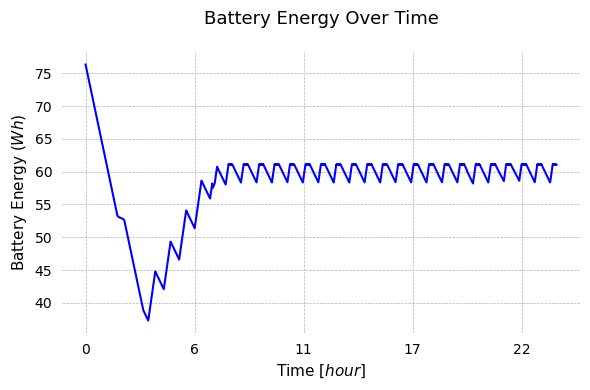

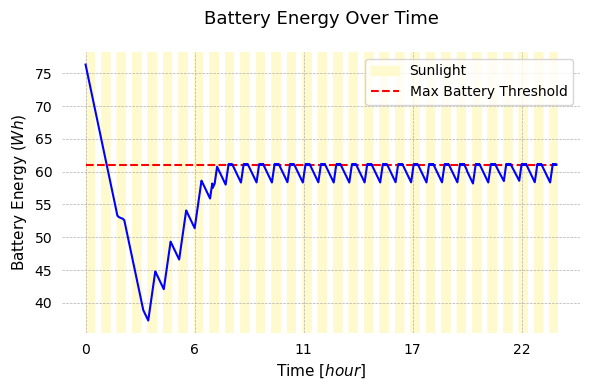

In [134]:
x_label, x_label_f = find_x_scale(simulation_time)
step = int(len(times) / 100)

# Function used in the framework
plot_1d(
    times,
    (battery * (u.W * u.s)).to(u.W * u.h),
    "Battery Energy Over Time",
    x_label,
    r"Battery Energy ($Wh$)",
    step=1,
    fill_under=False,
    remove_box=True,
    scatter=False,
    x_label_f=x_label_f,
    show=True,
    save_filename=folder + "battery_energy.png",
    markersize_plot=0,
)

# New function
plot_1d_and_background_and_threshold(
    times,
    (battery * (u.W * u.s)).to(u.W * u.h),
    "Battery Energy Over Time",
    x_label,
    r"Battery Energy ($Wh$)",
    boolean_array_background=1
    - eclipse,  # we want to display in yellow when there is sunlight
    colors_background="lemonchiffon",
    legend_background="Sunlight",
    horizontal_line_value=61.056,  # 80% of battery bacapity
    horizontal_line_color="red",
    horizontal_line_legend="Max Battery Threshold",
    step=1,
    fill_under=False,
    remove_box=True,
    scatter=False,
    x_label_f=x_label_f,
    show=True,
    save_filename=folder + "battery_energy.png",
    markersize_plot=0,
)

### 2. Data storage and visibility

In [135]:
folder = "data_report/1_day_sim/"
time_file = folder + "times.npy"
data_GNSS_TOF_file = folder + "data_GNSS_TOF.npy"
data_HK_file = folder + "data_HK.npy"
visibility_file = folder + "visibility.npy"

with open(time_file, "rb") as f:
    times = np.load(f)
with open(data_GNSS_TOF_file, "rb") as f:
    data_GNSS_TOF = np.load(f)
with open(data_HK_file, "rb") as f:
    data_HK = np.load(f)
with open(visibility_file, "rb") as f:
    visibility = np.load(f)

simulation_time = (times[-1] * u.s).to(u.day)
print(simulation_time)

1.0 d


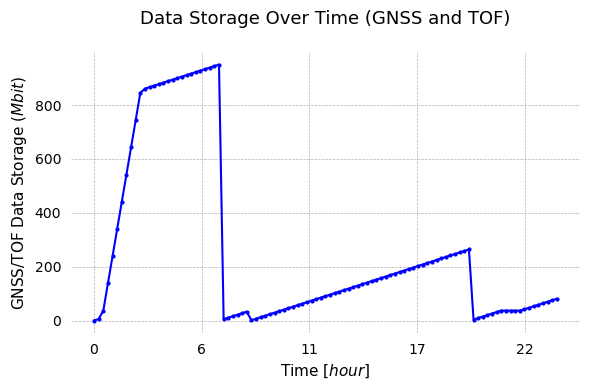

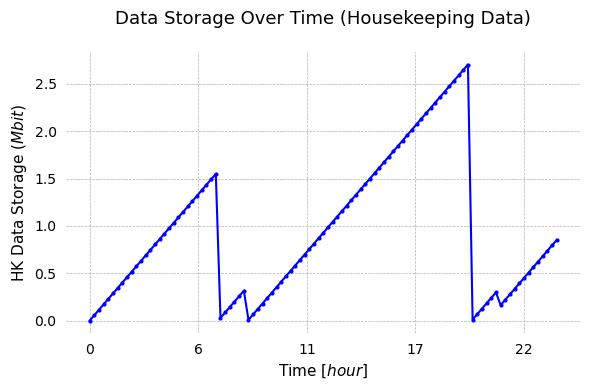

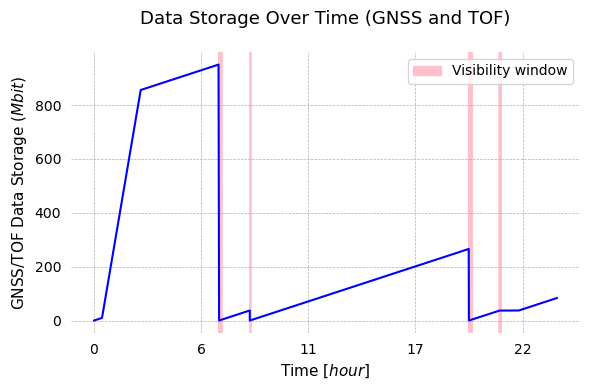

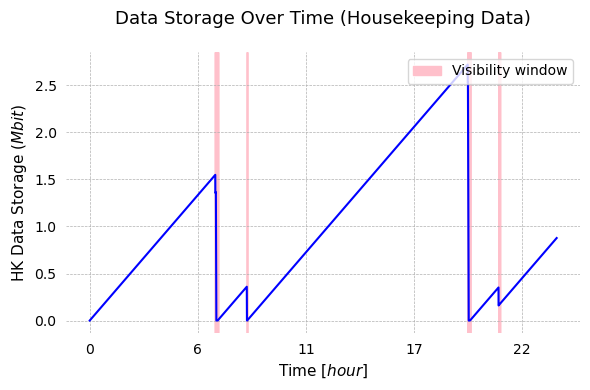

In [136]:
x_label, x_label_f = find_x_scale(simulation_time)
step = int(len(times) / 100)

# Function used in the framework
plot_1d(
    times,
    data_GNSS_TOF,
    "Data Storage Over Time (GNSS and TOF)",
    x_label,
    r"GNSS/TOF Data Storage ($Mbit$)",
    step=step,
    fill_under=False,
    remove_box=True,
    scatter=False,
    x_label_f=x_label_f,
    show=True,
    save_filename=folder + "data_storage_GNSS_TOF.png",
)
plot_1d(
    times,
    data_HK,
    "Data Storage Over Time (Housekeeping Data)",
    x_label,
    r"HK Data Storage ($Mbit$)",
    step=step,
    fill_under=False,
    remove_box=True,
    scatter=False,
    x_label_f=x_label_f,
    show=True,
    save_filename=folder + "data_storage_HK.png",
)


# New functions

plot_1d_and_background_and_threshold(
    times,
    data_GNSS_TOF,
    "Data Storage Over Time (GNSS and TOF)",
    x_label,
    r"GNSS/TOF Data Storage ($Mbit$)",
    boolean_array_background=visibility,  # Display visibility windows in the background
    colors_background="pink",
    legend_background="Visibility window",
    step=1,
    fill_under=False,
    remove_box=True,
    scatter=False,
    x_label_f=x_label_f,
    show=True,
    save_filename=folder + "data_storage_GNSS_TOF.png",
    markersize_plot=0,
)
plot_1d_and_background_and_threshold(
    times,
    data_HK,
    "Data Storage Over Time (Housekeeping Data)",
    x_label,
    r"HK Data Storage ($Mbit$)",
    boolean_array_background=visibility,  # Display visibility windows in the background
    colors_background="pink",
    legend_background="Visibility window",
    step=1,
    fill_under=False,
    remove_box=True,
    scatter=False,
    x_label_f=x_label_f,
    show=True,
    save_filename=folder + "data_storage_HK.png",
    markersize_plot=0,
)

### 3. Time spent in each mode

In [137]:
folder = "data_report/1_day_sim/"
time_file = folder + "times.npy"
modes_file = folder + "modes.npy"

with open(time_file, "rb") as f:
    times = np.load(f)
with open(modes_file, "rb") as f:
    modes = np.load(f)

simulation_time = (times[-1] * u.s).to(u.day)
print(simulation_time)

mode_dict = {
    0: "IDLE",
    1: "SAFE",
    2: "CHARGING",
    3: "UHF-COM",
    4: "XBAND-COM",
    5: "MEASUREMENT",
}

1.0 d


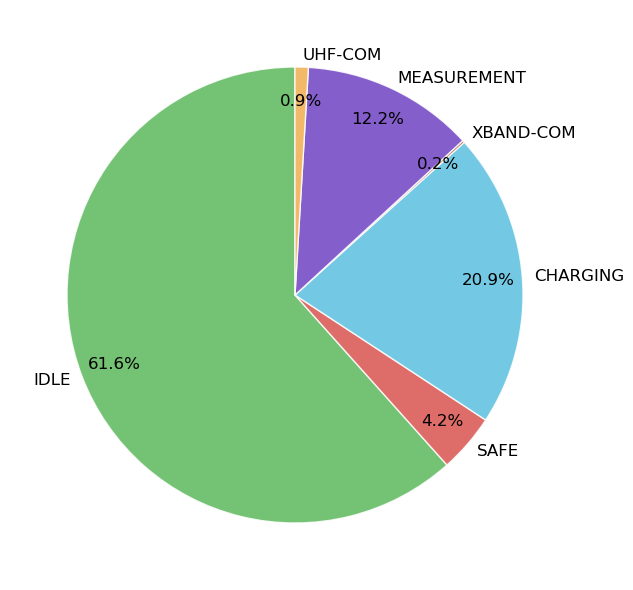

In [ ]:
# Calculate total simulation time and durations in each mode
total_time_seconds = times[-1] - times[0]  # Total simulation duration
time_differences = np.diff(times, prepend=0)  # Time spent in each step

# Calculate total time spent in each mode
unique_modes, mode_counts = np.unique(modes, return_counts=True)
mode_durations = {
    mode: np.sum(time_differences[modes == mode]) for mode in unique_modes
}

# Calculate percentages
mode_percentages = {
    mode: (duration / total_time_seconds) * 100
    for mode, duration in mode_durations.items()
}

# Prepare labels and values for plotting
labels = [mode_dict[mode] for mode in unique_modes]
percentages = [mode_percentages[mode] for mode in unique_modes]
colors = ["#5cb85c", "#d9534f", "#5bc0de", "#f0ad4e", "#a0522d", "#6f42c1"]

# Reordering labels, percentages, and colors for better spacing
reordered_indices = [0, 1, 2, 4, 5, 3]  # Custom order to move "X_BAND_COM" away
reordered_labels = [labels[i] for i in reordered_indices]
reordered_percentages = [percentages[i] for i in reordered_indices]
reordered_colors = [colors[i] for i in reordered_indices]

# Plot: Pie chart
fig, ax = plt.subplots(figsize=(7, 6))  # Larger figure for better spacing
wedges, texts, autotexts = ax.pie(
    reordered_percentages,
    labels=reordered_labels,
    autopct="%.1f%%",
    startangle=90,
    colors=reordered_colors[: len(reordered_labels)],
    wedgeprops={
        "edgecolor": "white",
        "linewidth": 1,
        "linestyle": "solid",
        "alpha": 0.85,
    },  # Wedge style
    textprops={"fontsize": 12, "color": "black"},  # Text styling
    pctdistance=0.85,  # Position percentage labels closer
    labeldistance=1.05,  # Push labels outside the circle for clarity
    shadow=False,  # Add shadow effect for better depth
)

# Add a title with custom font properties
# plt.title("Percentages in Each Operating Mode", fontsize=15, y=0.92)

# Tight layout to prevent overlap and save
plt.tight_layout()

# Save or display plot
plt.savefig(folder + "mode_percentages.png", dpi=300, bbox_inches="tight")
plt.show()

## B. Simulation of 15 days

### 1. Average time spent in each mode (+ pie chart with percentages)


In [2]:
folder = "data_report/15_days_sim/"
time_file = folder + "times.npy"
modes_file = folder + "modes.npy"
eclipse_file = folder + "eclipse.npy"

with open(time_file, "rb") as f:
    times = np.load(f)
with open(modes_file, "rb") as f:
    modes = np.load(f)
with open(eclipse_file, "rb") as f:
    eclipse = np.load(f)

simulation_time = (times[-1] * u.s).to(u.day)
print(simulation_time)

mode_dict = {
    0: "IDLE",
    1: "SAFE",
    2: "CHARGING",
    3: "UHF-COM",
    4: "XBAND-COM",
    5: "MEASUREMENT",
}

15.0 d


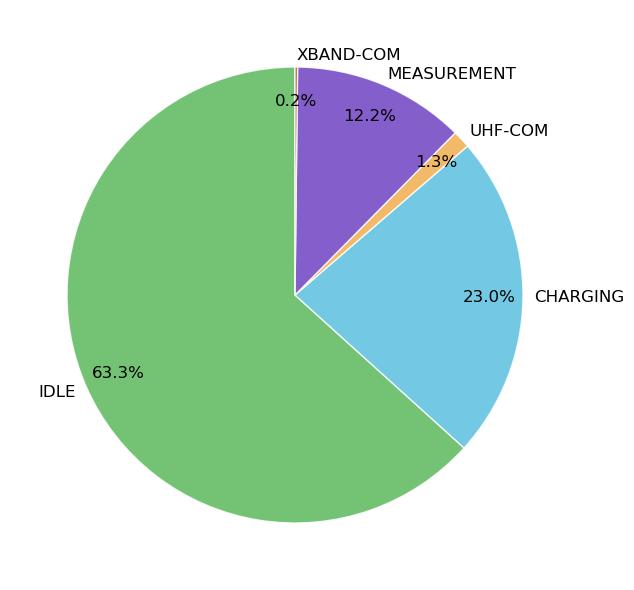

In [ ]:
# Calculate total simulation time and durations in each mode
total_time_seconds = times[-1] - times[0]  # Total simulation duration
time_differences = np.diff(times, prepend=0)  # Time spent in each step

# Calculate total time spent in each mode
unique_modes, mode_counts = np.unique(modes, return_counts=True)

mode_durations = {
    mode: np.sum(time_differences[modes == mode]) for mode in unique_modes
}

# Calculate percentages
mode_percentages = {
    mode: (duration / total_time_seconds) * 100
    for mode, duration in mode_durations.items()
}

# Prepare labels and values for plotting
labels = [mode_dict[mode] for mode in unique_modes]
percentages = [mode_percentages[mode] for mode in unique_modes]
colors = ["#5cb85c", "#5bc0de", "#f0ad4e", "#a0522d", "#6f42c1"]

# Reordering labels, percentages, and colors for better spacing
reordered_indices = [0, 1, 2, 4, 3]  # NO safe mod here!
reordered_labels = [labels[i] for i in reordered_indices]
reordered_percentages = [percentages[i] for i in reordered_indices]
reordered_colors = [colors[i] for i in reordered_indices]

# Plot: Pie chart
fig, ax = plt.subplots(figsize=(7, 6))  # Larger figure for better spacing
wedges, texts, autotexts = ax.pie(
    reordered_percentages,
    labels=reordered_labels,
    autopct="%.1f%%",
    startangle=90,
    colors=reordered_colors[: len(reordered_labels)],
    wedgeprops={
        "edgecolor": "white",
        "linewidth": 1,
        "linestyle": "solid",
        "alpha": 0.85,
    },  # Wedge style
    textprops={"fontsize": 12, "color": "black"},  # Text styling
    pctdistance=0.85,  # Position percentage labels closer
    labeldistance=1.05,  # Push labels outside the circle for clarity
    shadow=False,  # Add shadow effect for better depth
)

# Tight layout to prevent overlap and save
plt.tight_layout()

# Save or display plot
plt.savefig(folder + "mode_percentages.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
# Define the duration of a day in seconds
day_duration_seconds = 24 * 3600

# Initialize a dictionary to store daily mode durations
daily_mode_durations = {mode: [] for mode in unique_modes}

# Iterate over the simulation day by day
current_day = 0
start_index = 0

for i, time in enumerate(times):
    # Check if the current time exceeds the end of the current day
    if time > (current_day + 1) * day_duration_seconds:
        # Process data for the current day
        day_times = times[start_index:i]  # Times for this day
        day_modes = modes[start_index:i]  # Modes for this day
        day_time_differences = np.diff(day_times, prepend=day_times[0])

        # Calculate mode durations for this day
        for mode in unique_modes:
            mode_duration = np.sum(day_time_differences[day_modes == mode])
            daily_mode_durations[mode].append(mode_duration)

        # Move to the next day
        current_day += 1
        start_index = i

# Process the last day if necessary
if start_index < len(times):
    day_times = times[start_index:]
    day_modes = modes[start_index:]
    day_time_differences = np.diff(day_times, prepend=day_times[0])

    for mode in unique_modes:
        mode_duration = np.sum(day_time_differences[day_modes == mode])
        daily_mode_durations[mode].append(mode_duration)

# Calculate the average daily duration for each mode
average_daily_mode_durations = {
    mode: np.mean(durations) for mode, durations in daily_mode_durations.items()
}

# Convert to hours for better readability
average_daily_mode_durations_hours = {
    mode: duration / 3600 for mode, duration in average_daily_mode_durations.items()
}


def format_time(seconds):
    """Format seconds into hours, minutes, and seconds."""
    hours = int(seconds // 3600)
    minutes = int((seconds % 3600) // 60)
    seconds = int(seconds % 60)
    return f"{hours}h {minutes}m {seconds}s"


# Display results in formatted time
print("Average daily time spent in each mode (h:m:s):")
for (
    mode,
    duration,
) in average_daily_mode_durations.items():  # Using raw durations in seconds
    formatted_time = format_time(duration)
    print(f"{mode_dict[mode]}: {formatted_time}")

Average daily time spent in each mode (h:m:s):
IDLE: 15h 11m 28s
CHARGING: 5h 31m 44s
UHF-COM: 0h 18m 9s
XBAND-COM: 0h 2m 37s
MEASUREMENT: 2h 55m 50s


### 2. Telecom analysis

In [9]:
folder = "data_report/15_days_sim/"
time_file = folder + "times.npy"
vis_file = folder + "visibility.npy"

with open(time_file, "rb") as f:
    times = np.load(f)
with open(vis_file, "rb") as f:
    vis = np.load(f)
    visibility = np.sum(vis, axis=1)  # another shape to group all ground stations
    visibility[visibility != 0] = 1

simulation_time = (times[-1] * u.s).to(u.day)
print(simulation_time)

15.0 d


In [10]:
SECONDS_PER_DAY = 86400

# Find start and end indices of visibility windows
visibility_windows = []
start_index = None

for i in range(len(vis)):
    if vis[i] == 1 and start_index is None:
        start_index = i  # Start of a visibility window
    elif vis[i] == 0 and start_index is not None:
        visibility_windows.append((start_index, i))
        start_index = None
if start_index is not None:
    visibility_windows.append((start_index, len(vis) - 1))

# Calculate duration of each visibility window
visibility_durations = []
for start, end in visibility_windows:
    duration = times[end] - times[start]  # Duration in seconds
    visibility_durations.append(duration)

# Calculate gaps between visibility windows
gaps = []
for i in range(1, len(visibility_windows)):
    prev_end = visibility_windows[i - 1][1]
    curr_start = visibility_windows[i][0]
    gap = times[curr_start] - times[prev_end]  # Gap in seconds
    gaps.append(gap)

# Count visibility windows per day
visibility_per_day = defaultdict(int)
for start, _ in visibility_windows:
    day = times[start] // SECONDS_PER_DAY
    visibility_per_day[day] += 1

Average Visibility Duration: 340.1818181818263 seconds
25 % percentile visibility duration:  299.9999999999927
Average Gap Between Windows: 6.389917695473248 hours
Average Number of Windows Per Day: 3.6666666666666665


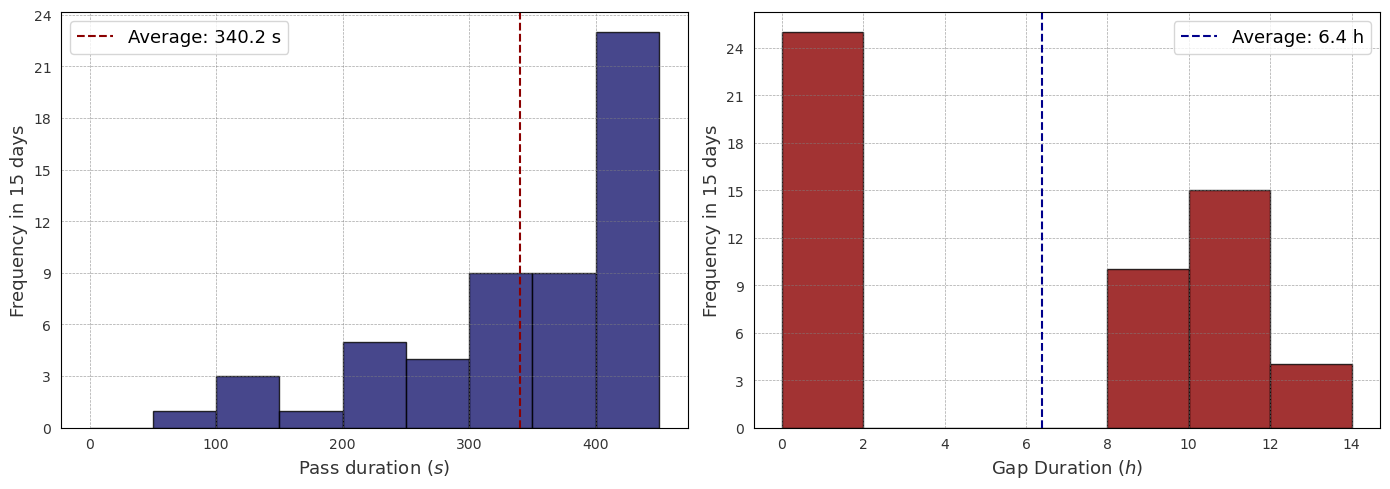

In [ ]:
gaps_in_hours = np.array(gaps) / 3600  # Convert gaps from seconds to hours

# Calculate averages
avg_visibility_duration = np.mean(visibility_durations)
percentile_25 = np.percentile(visibility_durations, 25)
avg_gap = np.mean(gaps_in_hours)
avg_windows_per_day = np.mean(list(visibility_per_day.values()))

# Print calculated averages
print("Average Visibility Duration:", avg_visibility_duration, "seconds")
print("25 % percentile visibility duration: ", percentile_25)
print("Average Gap Between Windows:", avg_gap, "hours")
print("Average Number of Windows Per Day:", avg_windows_per_day)

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Custom bins
visibility_duration_bins = np.arange(
    0, max(visibility_durations) + 50, 50
)  # Every 50 seconds
gaps_bins = np.arange(0, max(gaps_in_hours) + 2, 2)  # Every 2 hours

# Set white background and add grey dashed grid lines
fig.patch.set_facecolor("white")
for ax in [ax1, ax2]:
    ax.set_facecolor("white")
    ax.grid(
        color="grey", linestyle="--", linewidth=0.5, alpha=0.7
    )  # Grey dashed grid lines

# Plot histogram for visibility durations (dark blue)
ax1.hist(
    visibility_durations,
    bins=visibility_duration_bins,
    color="midnightblue",
    edgecolor="black",
    alpha=0.8,
)
ax1.axvline(
    avg_visibility_duration,
    color="darkred",
    linestyle="dashed",
    linewidth=1.5,
    label=f"Average: {avg_visibility_duration:.1f} s",
)
ax1.set_xlabel(r"Pass duration ($s$)", color=(0.2, 0.2, 0.2), fontsize=13)
ax1.set_ylabel(
    f"Frequency in {int(simulation_time.value)} days",
    color=(0.2, 0.2, 0.2),
    fontsize=13,
)
ax1.legend(fontsize=13)
ax1.yaxis.set_ticks_position("none")
ax1.xaxis.set_ticks_position("none")
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax1.tick_params(axis="x", colors=(0.2, 0.2, 0.2))
ax1.tick_params(axis="y", colors=(0.2, 0.2, 0.2))

ax2.hist(gaps_in_hours, bins=gaps_bins, color="darkred", edgecolor="black", alpha=0.8)
ax2.axvline(
    avg_gap,
    color="darkblue",
    linestyle="dashed",
    linewidth=1.5,
    label=f"Average: {avg_gap:.1f} h",
)
ax2.set_xlabel(r"Gap Duration ($h$)", color=(0.2, 0.2, 0.2), fontsize=13)
ax2.set_ylabel(
    f"Frequency in {int(simulation_time.value)} days",
    color=(0.2, 0.2, 0.2),
    fontsize=13,
)
ax2.legend(fontsize=13)
ax2.yaxis.set_ticks_position("none")
ax2.xaxis.set_ticks_position("none")
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
ax2.tick_params(axis="x", colors=(0.2, 0.2, 0.2))  # Dark grey in RGB
ax2.tick_params(axis="y", colors=(0.2, 0.2, 0.2))  # Dark grey in RGB

# Tight layout and display the plot
plt.tight_layout()
plt.savefig(folder + "telecom_analysis.png", dpi=300)
plt.show()

In [ ]:
# Telecom and Visibility Analysis

# Initialize lists to store daily visibility durations and visibility window counts
daily_visibility_times = []
daily_visibility_windows = (
    []
)  # New list to store the number of visibility windows per day

# Split the simulation day by day
current_day = 0
start_index = 0

for i, time in enumerate(times):
    if time > (current_day + 1) * day_duration_seconds:
        # Process current day's data
        day_times = times[start_index:i]
        day_visibility = visibility[start_index:i]
        day_time_differences = np.diff(day_times, prepend=day_times[0])

        # Calculate visibility and non-visibility durations
        vis_time = np.sum(day_time_differences[day_visibility == 1])
        non_vis_time = np.sum(day_time_differences[day_visibility == 0])
        daily_visibility_times.append((vis_time, non_vis_time))

        # Count the number of visibility windows (continuous 1's in visibility)
        visibility_windows = 0
        for j in range(1, len(day_visibility)):
            if day_visibility[j - 1] == 0 and day_visibility[j] == 1:
                visibility_windows += 1
        # If the first value is 1, count it as a visibility window
        if day_visibility[0] == 1:
            visibility_windows += 1
        daily_visibility_windows.append(visibility_windows)

        # Move to the next day
        current_day += 1
        start_index = i

# Handle the last day
if start_index < len(times):
    day_times = times[start_index:]
    day_visibility = visibility[start_index:]
    day_time_differences = np.diff(day_times, prepend=day_times[0])

    vis_time = np.sum(day_time_differences[day_visibility == 1])
    non_vis_time = np.sum(day_time_differences[day_visibility == 0])
    daily_visibility_times.append((vis_time, non_vis_time))

    # Count the number of visibility windows (continuous 1's in visibility)
    visibility_windows = 0
    for j in range(1, len(day_visibility)):
        if day_visibility[j - 1] == 0 and day_visibility[j] == 1:
            visibility_windows += 1
    if day_visibility[0] == 1:
        visibility_windows += 1
    daily_visibility_windows.append(visibility_windows)

# Compute average daily durations and visibility windows
avg_visibility_time = np.mean([t[0] for t in daily_visibility_times])
avg_non_visibility_time = np.mean([t[1] for t in daily_visibility_times])

# Calculate average number of visibility windows per day
avg_visibility_windows = np.mean(daily_visibility_windows)


# Function to format time
def format_time(seconds):
    hours = int(seconds // 3600)
    minutes = int((seconds % 3600) // 60)
    seconds = int(seconds % 60)
    return f"{hours}h {minutes}m {seconds}s"


# Display the results for visibility
print("Average daily visibility times (h:m:s):")
print(f"Visibility time: {format_time(avg_visibility_time)}")
print(f"Non-visibility time: {format_time(avg_non_visibility_time)}")
print(f"Average number of visibility windows per day: {avg_visibility_windows:.2f}")

Average daily visibility times (h:m:s):
Visibility time: 0h 20m 47s
Non-visibility time: 23h 39m 3s
Average number of visibility windows per day: 3.67


### 3. Eps analysis

In [27]:
folder = "data_report/15_days_sim/"
time_file = folder + "times.npy"
eclipse_file = folder + "eclipse.npy"
battery_file = folder + "battery.npy"

with open(time_file, "rb") as f:
    times = np.load(f)
with open(eclipse_file, "rb") as f:
    eclipse = np.load(f)
with open(battery_file, "rb") as f:
    battery = np.load(f)

simulation_time = (times[-1] * u.s).to(u.day)
print(simulation_time)

nb_day = simulation_time.value

15.0 d


In [ ]:
# Eclipse Analysis

# Initialize lists to store daily eclipse durations, min, and max battery values
daily_eclipse_times = []
daily_min_battery = []
daily_max_battery = []

# Split the simulation day by day
current_day = 0
start_index = 0

for i, time in enumerate(times):
    if time > (current_day + 1) * day_duration_seconds:
        # Process current day's data
        day_times = times[start_index:i]
        day_eclipse = eclipse[start_index:i]
        day_battery = battery[start_index:i]
        day_time_differences = np.diff(day_times, prepend=day_times[0])

        # Calculate eclipse and non-eclipse durations
        eclipse_time = np.sum(day_time_differences[day_eclipse == 1])
        non_eclipse_time = np.sum(day_time_differences[day_eclipse == 0])
        daily_eclipse_times.append((eclipse_time, non_eclipse_time))

        # Calculate the min and max battery values for the day
        min_battery = np.min(day_battery)
        max_battery = np.max(day_battery)
        daily_min_battery.append(min_battery)
        daily_max_battery.append(max_battery)

        # Move to the next day
        current_day += 1
        start_index = i

# Handle the last day
if start_index < len(times):
    day_times = times[start_index:]
    day_eclipse = eclipse[start_index:]
    day_battery = battery[start_index:]
    day_time_differences = np.diff(day_times, prepend=day_times[0])

    eclipse_time = np.sum(day_time_differences[day_eclipse == 1])
    non_eclipse_time = np.sum(day_time_differences[day_eclipse == 0])
    daily_eclipse_times.append((eclipse_time, non_eclipse_time))

    # Calculate the min and max battery values for the last day
    min_battery = np.min(day_battery)
    max_battery = np.max(day_battery)
    daily_min_battery.append(min_battery)
    daily_max_battery.append(max_battery)

# Compute average daily eclipse durations
avg_eclipse_time = np.mean([t[0] for t in daily_eclipse_times])
avg_non_eclipse_time = np.mean([t[1] for t in daily_eclipse_times])


# Display the results for eclipse
def format_time(seconds):
    hours = int(seconds // 3600)
    minutes = int((seconds % 3600) // 60)
    seconds = int(seconds % 60)
    return f"{hours}h {minutes}m {seconds}s"


print("Average daily eclipse times (h:m:s):")
print(f"Eclipse time: {format_time(avg_eclipse_time)}")
print(f"Non-eclipse time: {format_time(avg_non_eclipse_time)}")

# Display the min and max battery values per day
print("\nDaily Min and Max Battery Values:")
print(f"Min battery per day: {daily_min_battery}")
print(f"Max battery per day: {daily_max_battery}")

Average daily eclipse times (h:m:s):
Eclipse time: 12h 30m 0s
Non-eclipse time: 11h 29m 50s

Daily Min and Max Battery Values:
Min battery per day: [134278.67466652897, 91427.49819815293, 87500.71899328768, 102313.01342764152, 88356.60549573599, 93560.18927775789, 90718.56359722538, 102488.64935056571, 98303.81241014187, 96111.15667827771, 97258.70158264397, 94804.42643293286, 105823.73640365849, 92771.74272856151, 96145.20843078884]
Max battery per day: [274752.0, 220010.3738032568, 220010.12348869687, 220010.42105218396, 220009.84957066222, 220010.28960359018, 220010.09805341286, 220010.36850350158, 220010.42701140908, 220009.98740362932, 220010.12545027523, 220010.26209226088, 220010.2469498354, 220010.395635225, 220010.1883808247]


<function seconds_to_days at 0x1482be710>


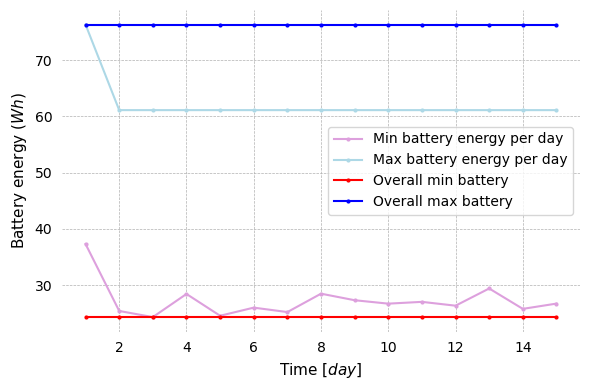

In [31]:
x_label, x_label_f = find_x_scale(simulation_time)
print(x_label_f)

steps = [1, 1, 1, 1]
labels = [
    "Min battery energy per day",
    "Max battery energy per day",
    "Overall min battery",
    "Overall max battery",
]
colors = ["plum", "lightblue", "red", "blue"]
xs = [
    np.arange(1, nb_day + 1),
    np.arange(1, nb_day + 1),
    np.arange(1, nb_day + 1),
    np.arange(1, nb_day + 1),
]
ys = [
    (daily_min_battery * (u.W * u.s)).to(u.W * u.h),
    (daily_max_battery * (u.W * u.s)).to(u.W * u.h),
    ((np.ones(int(nb_day)) * np.min(daily_min_battery)) * (u.W * u.s)).to(u.W * u.h),
    ((np.ones(int(nb_day)) * np.max(daily_max_battery)) * (u.W * u.s)).to(u.W * u.h),
]


plot_1d_multiple(
    xs,
    ys,
    "",  # "Spacecraft Altitude Over Time",
    x_label,
    r"Battery energy ($Wh$)",
    colors=colors,
    labels=labels,
    step=steps,
    fill_under=False,
    remove_box=True,
    show=True,
    # x_label_f=x_label_f,
    save_filename=folder + "battery_stats.png",
)

## C. Case study

In [64]:
folder = "data_report/case_study/"
time_file = folder + "times.npy"
battery_nadir_file = folder + "battery_nadir.npy"
battery_sun_file = folder + "battery_sun.npy"
battery_no_sun_file = folder + "battery_no_sun.npy"
visibility_file = folder + "visibility.npy"

with open(time_file, "rb") as f:
    times = np.load(f)
with open(battery_nadir_file, "rb") as f:
    battery_nadir = np.load(f)
with open(battery_sun_file, "rb") as f:
    battery_sun = np.load(f)
with open(battery_no_sun_file, "rb") as f:
    battery_no_sun = np.load(f)
with open(visibility_file, "rb") as f:
    visibility = np.load(f)

simulation_time = (times[-1] * u.s).to(u.day)
print(simulation_time)

low_battery_limit = 15.264

1.875 d


<function seconds_to_hours at 0x14aaff400>


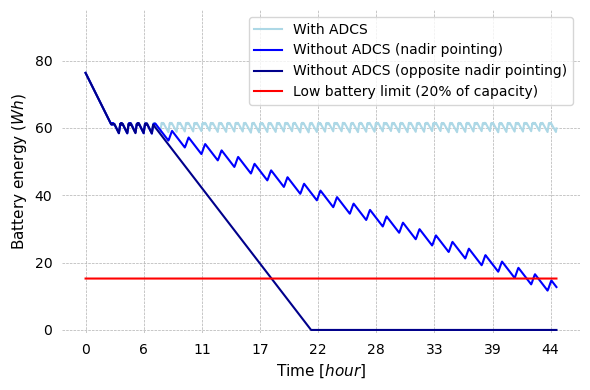

In [65]:
x_label, x_label_f = find_x_scale(simulation_time)
print(x_label_f)

steps = [1, 1, 1, 1]
labels = [
    "With ADCS",
    "Without ADCS (nadir pointing)",
    "Without ADCS (opposite nadir pointing)",
    "Low battery limit (20% of capacity)",
]
colors = ["lightblue", "blue", "darkblue", "red"]
xs = [times, times, times, times]
ys = [
    (battery_sun * (u.W * u.s)).to(u.W * u.h),
    (battery_nadir * (u.W * u.s)).to(u.W * u.h),
    (battery_no_sun * (u.W * u.s)).to(u.W * u.h),
    np.ones(len(times)) * low_battery_limit,
]


plot_1d_multiple(
    xs,
    ys,
    "",  # "Spacecraft Altitude Over Time",
    x_label,
    r"Battery energy ($Wh$)",
    colors=colors,
    labels=labels,
    step=steps,
    fill_under=False,
    remove_box=True,
    show=True,
    x_label_f=x_label_f,
    save_filename=folder + "battery_evolution.png",
    markersize_plot=0,
    y_range=[-1, 95],
)

In [66]:
# Constants
low_battery_limit = (low_battery_limit * (u.W * u.h)).to(u.W * u.s).value
seconds_per_hour = 3600


def format_time(seconds):
    """Convert seconds into hours, minutes, and seconds."""
    hours = int(seconds // 3600)
    minutes = int((seconds % 3600) // 60)
    seconds = int(seconds % 60)
    return f"{hours}h {minutes}m {seconds}s"


# Find the first index where battery_no_sun is below the limit
first_low_no_sun_index = np.where(battery_no_sun < low_battery_limit)[0]
if first_low_no_sun_index.size > 0:
    first_low_no_sun_index = first_low_no_sun_index[0]
    corresponding_time_no_sun = times[first_low_no_sun_index]  # Time in seconds
    formatted_time_no_sun = format_time(corresponding_time_no_sun)
    print(f"First index below limit for battery_no_sun: {first_low_no_sun_index}")
    print(f"Corresponding time for battery_no_sun: {formatted_time_no_sun}")
else:
    print("No battery_no_sun values are below the limit.")

# Find the first index where battery_nadir is below the limit
first_low_nadir_index = np.where(battery_nadir < low_battery_limit)[0]
if first_low_nadir_index.size > 0:
    first_low_nadir_index = first_low_nadir_index[0]
    corresponding_time_nadir = times[first_low_nadir_index]  # Time in seconds
    formatted_time_nadir = format_time(corresponding_time_nadir)
    print(f"First index below limit for battery_nadir: {first_low_nadir_index}")
    print(f"Corresponding time for battery_nadir: {formatted_time_nadir}")
else:
    print("No battery_nadir values are below the limit.")

# Find the first index where visibility is 1 (satellite becomes visible)
first_visibility_index = np.where(visibility == 1)[0]

if first_visibility_index.size > 0:
    first_visibility_index = first_visibility_index[0]
    corresponding_visibility_time = times[first_visibility_index]  # Time in seconds
    formatted_visibility_time = format_time(corresponding_visibility_time)
    print(f"First index of visibility: {first_visibility_index}")
    print(
        f"Corresponding time when satellite becomes visible: {formatted_visibility_time}"
    )
else:
    print("The satellite was never visible in the provided simulation.")

First index below limit for battery_no_sun: 1067
Corresponding time for battery_no_sun: 17h 46m 59s
First index below limit for battery_nadir: 2530
Corresponding time for battery_nadir: 42h 10m 0s
First index of visibility: 388
Corresponding time when satellite becomes visible: 6h 28m 0s


In [67]:
# Subtract visibility time from battery no sun time
if first_low_no_sun_index.size > 0 and first_visibility_index.size > 0:
    time_difference_no_sun = corresponding_time_no_sun - corresponding_visibility_time
    formatted_time_diff_no_sun = format_time(time_difference_no_sun)
    print(
        f"Time difference (battery_no_sun vs visibility): {formatted_time_diff_no_sun}"
    )
else:
    print(
        "No time difference calculated for battery_no_sun (missing visibility or battery drop)."
    )

# Subtract visibility time from battery nadir time
if first_low_nadir_index.size > 0 and first_visibility_index.size > 0:
    time_difference_nadir = corresponding_time_nadir - corresponding_visibility_time
    formatted_time_diff_nadir = format_time(time_difference_nadir)
    print(f"Time difference (battery_nadir vs visibility): {formatted_time_diff_nadir}")
else:
    print(
        "No time difference calculated for battery_nadir (missing visibility or battery drop)."
    )

Time difference (battery_no_sun vs visibility): 11h 18m 59s
Time difference (battery_nadir vs visibility): 35h 42m 0s
